In [74]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC #support vector classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [75]:
df =pd.read_csv('1614141926_drugEffects.csv').drop(columns=['Unnamed: 0'])
df.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


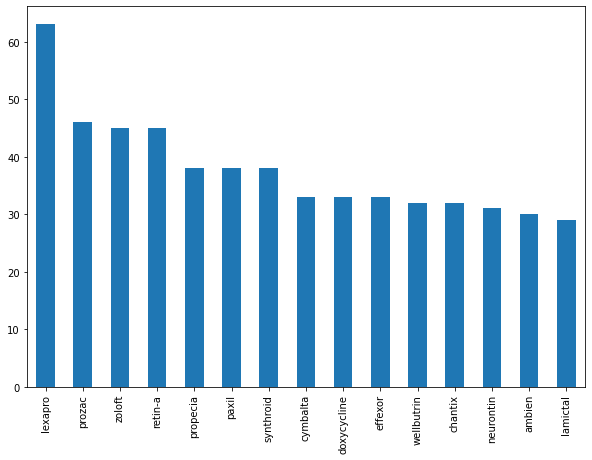

In [76]:
df['urlDrugName'].value_counts().head(15).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

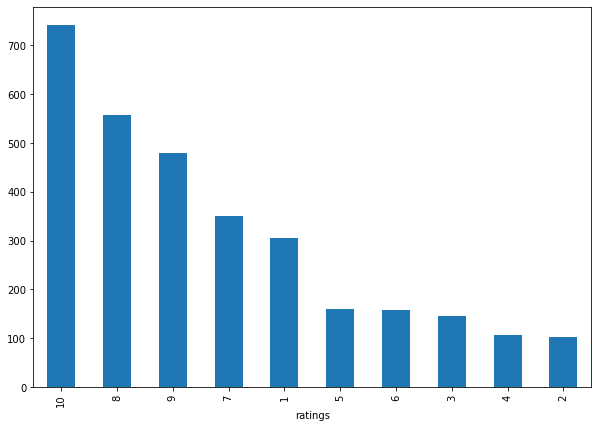

In [77]:
# check the ratings of the drugs

df['rating'].value_counts().head(15).plot(kind='bar')
plt.xlabel('ratings')
plt.show()

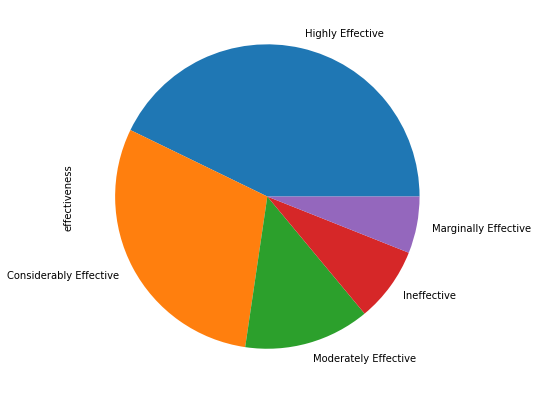

In [78]:
# check the effectiveness of the drugs

df['effectiveness'].value_counts().plot(kind='pie')
plt.show()

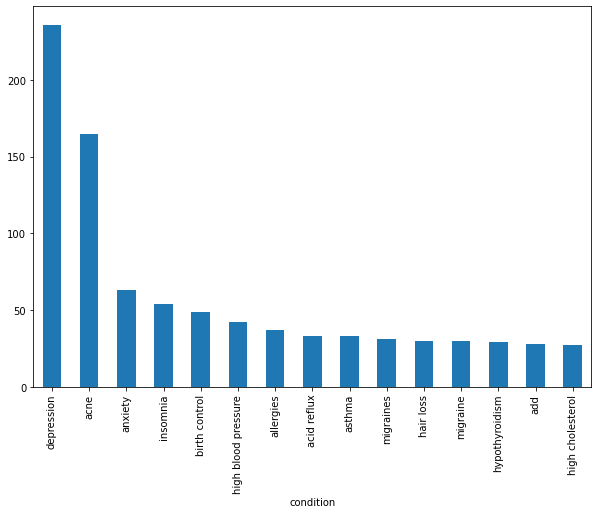

In [79]:
# check the various conditions the medicine cures (top 10) since they are over thousand

df['condition'].value_counts().head(15).plot(kind='bar')
plt.xlabel('condition')
plt.show()

In [80]:
target=df.pop('sideEffects')
df.head()

,urlDrugName,rating,effectiveness,condition
0,enalapril,4,Highly Effective,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,birth prevention
2,ponstel,10,Highly Effective,menstrual cramps
3,prilosec,3,Marginally Effective,acid reflux
4,lyrica,2,Marginally Effective,fibromyalgia


In [81]:
#let convert categorical data to numeric 

cols=['urlDrugName','effectiveness','condition']
for x in cols:
    df[x]=pd.factorize(df[x])[0]
    
target=pd.factorize(target)[0]
df.head()

,urlDrugName,rating,effectiveness,condition
0,0,4,0,0
1,1,1,0,1
2,2,10,0,2
3,3,3,1,3
4,4,2,1,4


In [82]:
# scaling the data before modelling

scaler=StandardScaler()
df=scaler.fit_transform(df)
df

array([[-1.21297976, -1.02349444, -1.04689456, -0.94221638],
       [-1.20449215, -2.04490682, -1.04689456, -0.93987936],
       [-1.19600454,  1.01933033, -1.04689456, -0.93754234],
       ...,
       [ 0.35722814, -1.70443603, -0.41222112,  2.38803771],
       [ 3.03931298,  0.33838874,  0.85712577, -0.67112201],
       [ 1.16355111, -1.02349444,  1.49179921, -0.74123262]])

# Split data 

In [83]:
x_train,x_test,y_train,y_test = train_test_split(df,target, test_size=.3)

# using SVM

In [84]:
#using SVM

svm_clf=SVC().fit(x_train,y_train)

svm_pred=svm_clf.predict(x_test)

print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.46      0.58      0.51       299
           1       0.39      0.48      0.43       110
           2       0.57      0.54      0.55       275
           3       0.41      0.22      0.28        60
           4       0.41      0.28      0.33       189

    accuracy                           0.47       933
   macro avg       0.45      0.42      0.42       933
weighted avg       0.47      0.47      0.46       933




# using random forest

In [85]:
#using random forest


rf_clf=RandomForestClassifier().fit(x_train,y_train)

rf_pred=rf_clf.predict(x_test)

print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.44      0.51      0.47       299
           1       0.35      0.38      0.37       110
           2       0.57      0.53      0.55       275
           3       0.45      0.37      0.40        60
           4       0.43      0.38      0.41       189

    accuracy                           0.46       933
   macro avg       0.45      0.43      0.44       933
weighted avg       0.47      0.46      0.46       933



# using decision tree 

In [86]:
# using decision tree 

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
prediction=clf.predict(x_test)

In [87]:
prediction

array([2, 4, 4, 0, 0, 4, 1, 4, 4, 4, 2, 0, 2, 0, 2, 2, 4, 2, 0, 3, 2, 0,
       0, 0, 1, 2, 2, 2, 2, 2, 2, 4, 2, 4, 0, 0, 0, 4, 0, 1, 2, 4, 0, 2,
       2, 0, 0, 4, 2, 3, 0, 1, 0, 2, 4, 3, 2, 0, 4, 4, 1, 0, 2, 3, 2, 4,
       4, 4, 0, 0, 2, 1, 0, 0, 4, 0, 0, 2, 4, 2, 2, 2, 1, 1, 0, 0, 0, 2,
       0, 2, 2, 4, 4, 1, 0, 0, 0, 0, 1, 0, 0, 0, 4, 1, 0, 1, 2, 0, 2, 0,
       0, 2, 0, 4, 3, 4, 0, 4, 2, 2, 4, 4, 4, 4, 4, 2, 0, 0, 1, 0, 0, 2,
       2, 1, 1, 4, 1, 1, 4, 3, 2, 0, 0, 2, 0, 1, 0, 4, 3, 0, 4, 2, 2, 0,
       1, 0, 4, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0,
       2, 2, 0, 0, 0, 0, 4, 2, 4, 4, 0, 2, 0, 0, 2, 0, 1, 0, 0, 3, 1, 1,
       1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 4, 2, 0, 0, 2, 0,
       2, 0, 4, 3, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 4, 0, 0, 1, 0, 4, 4, 4,
       0, 0, 0, 2, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0, 4, 4, 1, 2, 0, 0, 0, 4,
       1, 4, 2, 0, 1, 2, 2, 0, 3, 3, 4, 2, 0, 3, 0, 0, 2, 2, 0, 2, 0, 2,
       1, 2, 1, 1, 0, 2, 3, 2, 0, 3, 0, 2, 0, 4, 2,

[Text(279.0, 348.81, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(236.07692307692307, 285.39, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(321.9230769230769, 285.39, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(171.69230769230768, 221.97, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(85.84615384615384, 158.55, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(42.92307692307692, 95.13, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(128.76923076923077, 95.13, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(257.53846153846155, 158.55, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(214.61538461538458, 95.13, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(300.46153846153845, 95.13, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(257.53846153846155, 31.710000000000036, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(3

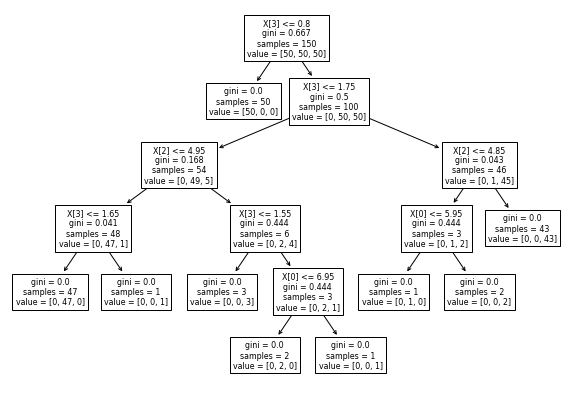

In [88]:
from sklearn.datasets import load_iris
iris = load_iris()
df,target = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df, target)
tree.plot_tree(clf) 

# using KNN

In [89]:
 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,target)

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
y_pred = classifier.predict(X_test)

In [93]:
y_pred

array([0, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 0, 2, 0, 1, 0, 0, 2, 2,
       2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 1])

In [94]:
y_test

array([0, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2,
       2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 1])

In [98]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
acc

0.9736842105263158